In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [9]:
train_df = pd.read_csv("../dataset/train.csv", header=None)

In [10]:
train_df.head()

,0,1
0,171,003900.jpg
1,171,003062.jpg
2,171,000053.jpg
3,171,000920.jpg
4,171,001120.jpg


In [11]:
len(set(train_df[0]))

72

In [2]:
data_dir = "../dataset/imgs/"
out_dir = "../dataset/resize_img/"

In [3]:
all_image_files = os.listdir(data_dir)

In [4]:
id2img = {}

max_size = 512
diff_range = np.array([0.25, 0.5, 0.75, 1.0])


# for i in range(len(train_df)):
    
#     idx = train_df.iloc[i,0]
#     img_name = train_df.iloc[i,1]
    
#     if idx not in id2img:
#         id2img[idx] = {}
    
for img_name in all_image_files:
    img = cv2.imread(data_dir + img_name)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     id2img[idx][img_name] = img
    
    h, w = img.shape[:2]
    
    r = h / w
    wider = True
    if h >= w:
        r = w / h
        wider = False
    
    r = np.round(r, 2)
    
    diff = abs(diff_range - r)
    
    ratio = diff_range[diff.argmin()]
    
    short_size = int(ratio * max_size)
    
    if wider:
        out_img = cv2.resize(img, (max_size, short_size))
    else:
        out_img = cv2.resize(img, (short_size, max_size))
    
    cv2.imwrite(out_dir + '/' + img_name, out_img)
    
    
# id2img = { k:id2img[k] for k in sorted( list(id2img.keys())) }

In [5]:
out_img.shape

(256, 512, 3)

In [ ]:
0.25
0.5
0.75
1.0

In [8]:
id2img.keys()

dict_keys([0, 1, 3, 6, 12, 13, 22, 24, 25, 27, 28, 30, 33, 34, 39, 40, 42, 43, 45, 51, 54, 55, 57, 60, 64, 66, 67, 69, 72, 76, 78, 81, 82, 85, 88, 90, 91, 94, 96, 97, 100, 106, 108, 109, 114, 115, 117, 124, 126, 129, 130, 132, 136, 139, 142, 145, 148, 151, 153, 154, 160, 168, 171, 172, 175, 177, 178, 181, 187, 195, 196, 198])

In [8]:
id2img[54].keys()

dict_keys(['001260.jpg', '003849.jpg', '001659.jpg', '003486.jpg', '000585.jpg', '003148.jpg', '005062.jpg', '002842.jpg', '001536.jpg', '002772.jpg', '000543.jpg', '003617.jpg', '000603.jpg', '002490.jpg', '003425.jpg', '005121.jpg', '004007.jpg', '003725.jpg', '004196.jpg'])

In [13]:
import math

In [15]:
np.round(r, 2)

0.56

In [16]:
# max_side = []
# min_side = []

ratio = []

for k in id2img:
    for fn in id2img[k]:
        h, w = id2img[k][fn].shape[:2]
        
        r = h / w
        
        if h > w:
            r = w / h
        
        ratio.append( np.round(r, 2) )
        
#         if h >= w :
#             max_side.append(h)
#             min_side.append(w)
#         else:
#             max_side.append(w)
#             min_side.append(h)

In [17]:
max(ratio)

1.0

In [18]:
min(ratio)

0.24

(array([  2.,   3.,  50., 206., 245., 251., 167.,  97.,  91.,  76.]),
 array([0.24 , 0.316, 0.392, 0.468, 0.544, 0.62 , 0.696, 0.772, 0.848,
        0.924, 1.   ]),
 <a list of 10 Patch objects>)

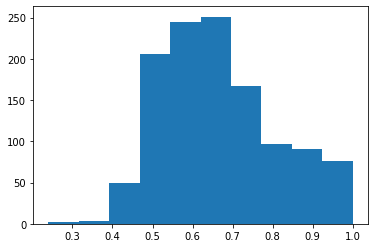

In [19]:
plt.clf()
plt.hist(ratio)

In [21]:
from collections import Counter

In [11]:
min(max_side)

89

In [14]:
max(min_side)

1030

In [16]:
max_side[761]

1096

In [15]:
min_side.index(1030)

761

(array([ 68., 265., 232., 157., 108., 114., 105.,  84.,  41.,  14.]),
 array([  48. ,  146.2,  244.4,  342.6,  440.8,  539. ,  637.2,  735.4,
         833.6,  931.8, 1030. ]),
 <a list of 10 Patch objects>)

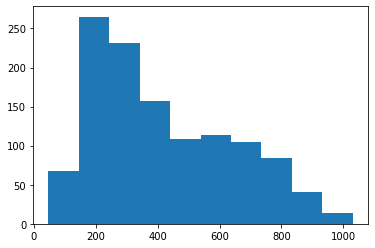

In [28]:
plt.clf()
plt.hist(all_h)

In [25]:
sorted(Counter(ratio).items(), key=lambda x:x[1], reverse=True)

[(0.5555555555555556, 3),
 (0.5109540636042402, 2),
 (0.5151098901098901, 2),
 (0.4925986842105263, 2),
 (0.4421052631578947, 2),
 (0.553002223869533, 2),
 (0.6363636363636364, 2),
 (0.5900621118012422, 2),
 (0.8489425981873112, 2),
 (0.676954732510288, 2),
 (0.6666666666666666, 2),
 (0.49411764705882355, 2),
 (0.7027027027027027, 2),
 (0.5, 2),
 (0.5270758122743683, 2),
 (0.7740112994350282, 2),
 (0.6190828402366864, 2),
 (0.6763754045307443, 2),
 (0.8458100558659218, 2),
 (0.7596830985915493, 2),
 (0.6669242658423493, 2),
 (0.5714285714285714, 2),
 (0.6385542168674698, 2),
 (0.7516339869281046, 2),
 (0.6854838709677419, 2),
 (0.5576070901033974, 1),
 (0.5854572713643178, 1),
 (0.4417139256458727, 1),
 (0.6103108415466262, 1),
 (0.5154362416107383, 1),
 (0.5372937293729373, 1),
 (0.6271324126726239, 1),
 (0.6148148148148148, 1),
 (0.597552195824334, 1),
 (0.4596977329974811, 1),
 (0.7767489711934157, 1),
 (0.9957924263674615, 1),
 (0.675954592363261, 1),
 (0.5723809523809524, 1),
 (0.

In [8]:
# plt.clf()
# plt.imshow( cv2.cvtColor(id2img[0]['001703.jpg'], cv2.COLOR_RGB2GRAY) , cmap='gray')

In [ ]:
img_num = []
all_img = []

for k in id2img:
    count = 0
    for fn in id2img[k]:
        count += 1
        all_img.append(id2img[k][fn].astype(np.float64))
    
    img_num.append(count)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ck20jimmy/anaconda3/envs/DLCV_final/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-b161da2b416a>", line 8, in <module>
    all_img.append(id2img[k][fn].astype(np.float64))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ck20jimmy/anaconda3/envs/DLCV_final/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ck20jimmy/anaconda3/envs/DLCV_final/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number

In [9]:
img_num[1]

10

In [27]:
img_num[2]

20

In [29]:
sum(img_num[:2])

22

In [12]:
gallery_df = pd.read_csv("../dataset/gallery.csv", header=None)

In [13]:
gallery_df.head()

,0,1
0,250,001170.jpg
1,256,001504.jpg
2,247,003177.jpg
3,238,000323.jpg
4,264,002276.jpg


In [14]:
gallery_df.shape

(35, 2)

In [17]:
len(set(gallery_df[0]))

35